# Gaia EDR3 Local H-R Diagrams

Figure 1.10 from Chapter 1 of *Stellar Structure & Evolution* Pinsonneault & Ryden, Cambridge University Press.

Hertzsprung-Russell diagrams for local stars from Gaia EDR3. Make as a single 2-panel figure.

Gaia EDR3 Selection
 * parallax > 10mas
 * parallax error 1% ($\sigma_\varpi/\varpi$<0.01)
 * M$_G$<18
 
The file has data for 226,635 stars

In [5]:
%matplotlib inline

import os, sys, math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter

import warnings
warnings.filterwarnings('ignore',category=UserWarning, append=True)

## Standard Plot Format

Setup the standard plotting format and make the plot. 

In [6]:
plotFile = 'Fig1_10.png' 

# graphic aspect ratio = width/height

aspect = 1.8

#
# Don't change these unless you really need to (we never have)
#
# fPage is the horizontal fraction of the page occupied by the figure, default 1.0
#
# scaleFac is the LaTeX includegraphics scaling in units of \textwidth, default 1.0
#

fPage = 1.0
scaleFac = 0.85

# Text width in inches - don't change, this is defined by the print layout

textWidth = 6.0 # inches

# Graphic dimensions depending on bitmap or vector format (draft vs production)

dpi = 600
plotWidth = dpi*fPage*textWidth
plotHeight = plotWidth/aspect
axisFontSize = 10
labelFontSize = 8
lwidth = 0.5
axisPad = 5
wInches = fPage*textWidth # float(plotWidth)/float(dpi)
hInches = wInches/aspect  # float(plotHeight)/float(dpi)
    
# LaTeX is used throughout for markup of symbols, Times-Roman serif font

plt.rc('text', usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times-Roman'],'weight':'bold','size':'16'})

# Font and line weight defaults for axes

matplotlib.rc('axes',linewidth=lwidth)
matplotlib.rcParams.update({'font.size':axisFontSize})

# axis and label padding

plt.rcParams['xtick.major.pad']=f'{axisPad}'
plt.rcParams['ytick.major.pad']=f'{axisPad}'
plt.rcParams['axes.labelpad'] = f'{axisPad}'

## Gaia EDR3 Data

The EDR3 search was...
<pre>
SELECT phot_g_mean_mag-phot_rp_mean_mag AS color, phot_g_mean_mag+5*log10(parallax)-10 AS mg, parallax FROM gaiaedr3.gaia_source
WHERE parallax_over_error > 100
AND parallax > 10
AND phot_g_mean_mag < 18
</pre>

Data columns are
 * BP-RP = observed BP-RP color
 * MB = absolute magnitude in the Gaia G band derived from apparent G and parallax
 * logT = log10 of effective temperature in K
 * logL = log10 of luminosity in L$_{sun}$ using the bolometric corrections of xxx
 * Gaia parallax in mas


In [7]:
dataFile = 'Gaia_EDR3_HR.txt'

data = pd.read_csv(dataFile,sep=r'\s+',comment='#')

MG = np.array(data['MG'])
BP_RP = np.array(data['BP-RP'])
logTeff = np.array(data['logT'])
logL = np.array(data['logL'])

## Figure 1.10 - Gaia EDR3 H-R diagrams

2-panel side-by-side plot
 * left: observed color magnitude diagram (M$_G$ vs $B-V$)
 * right: physical H-R diagram (L vs T$_{eff}$)

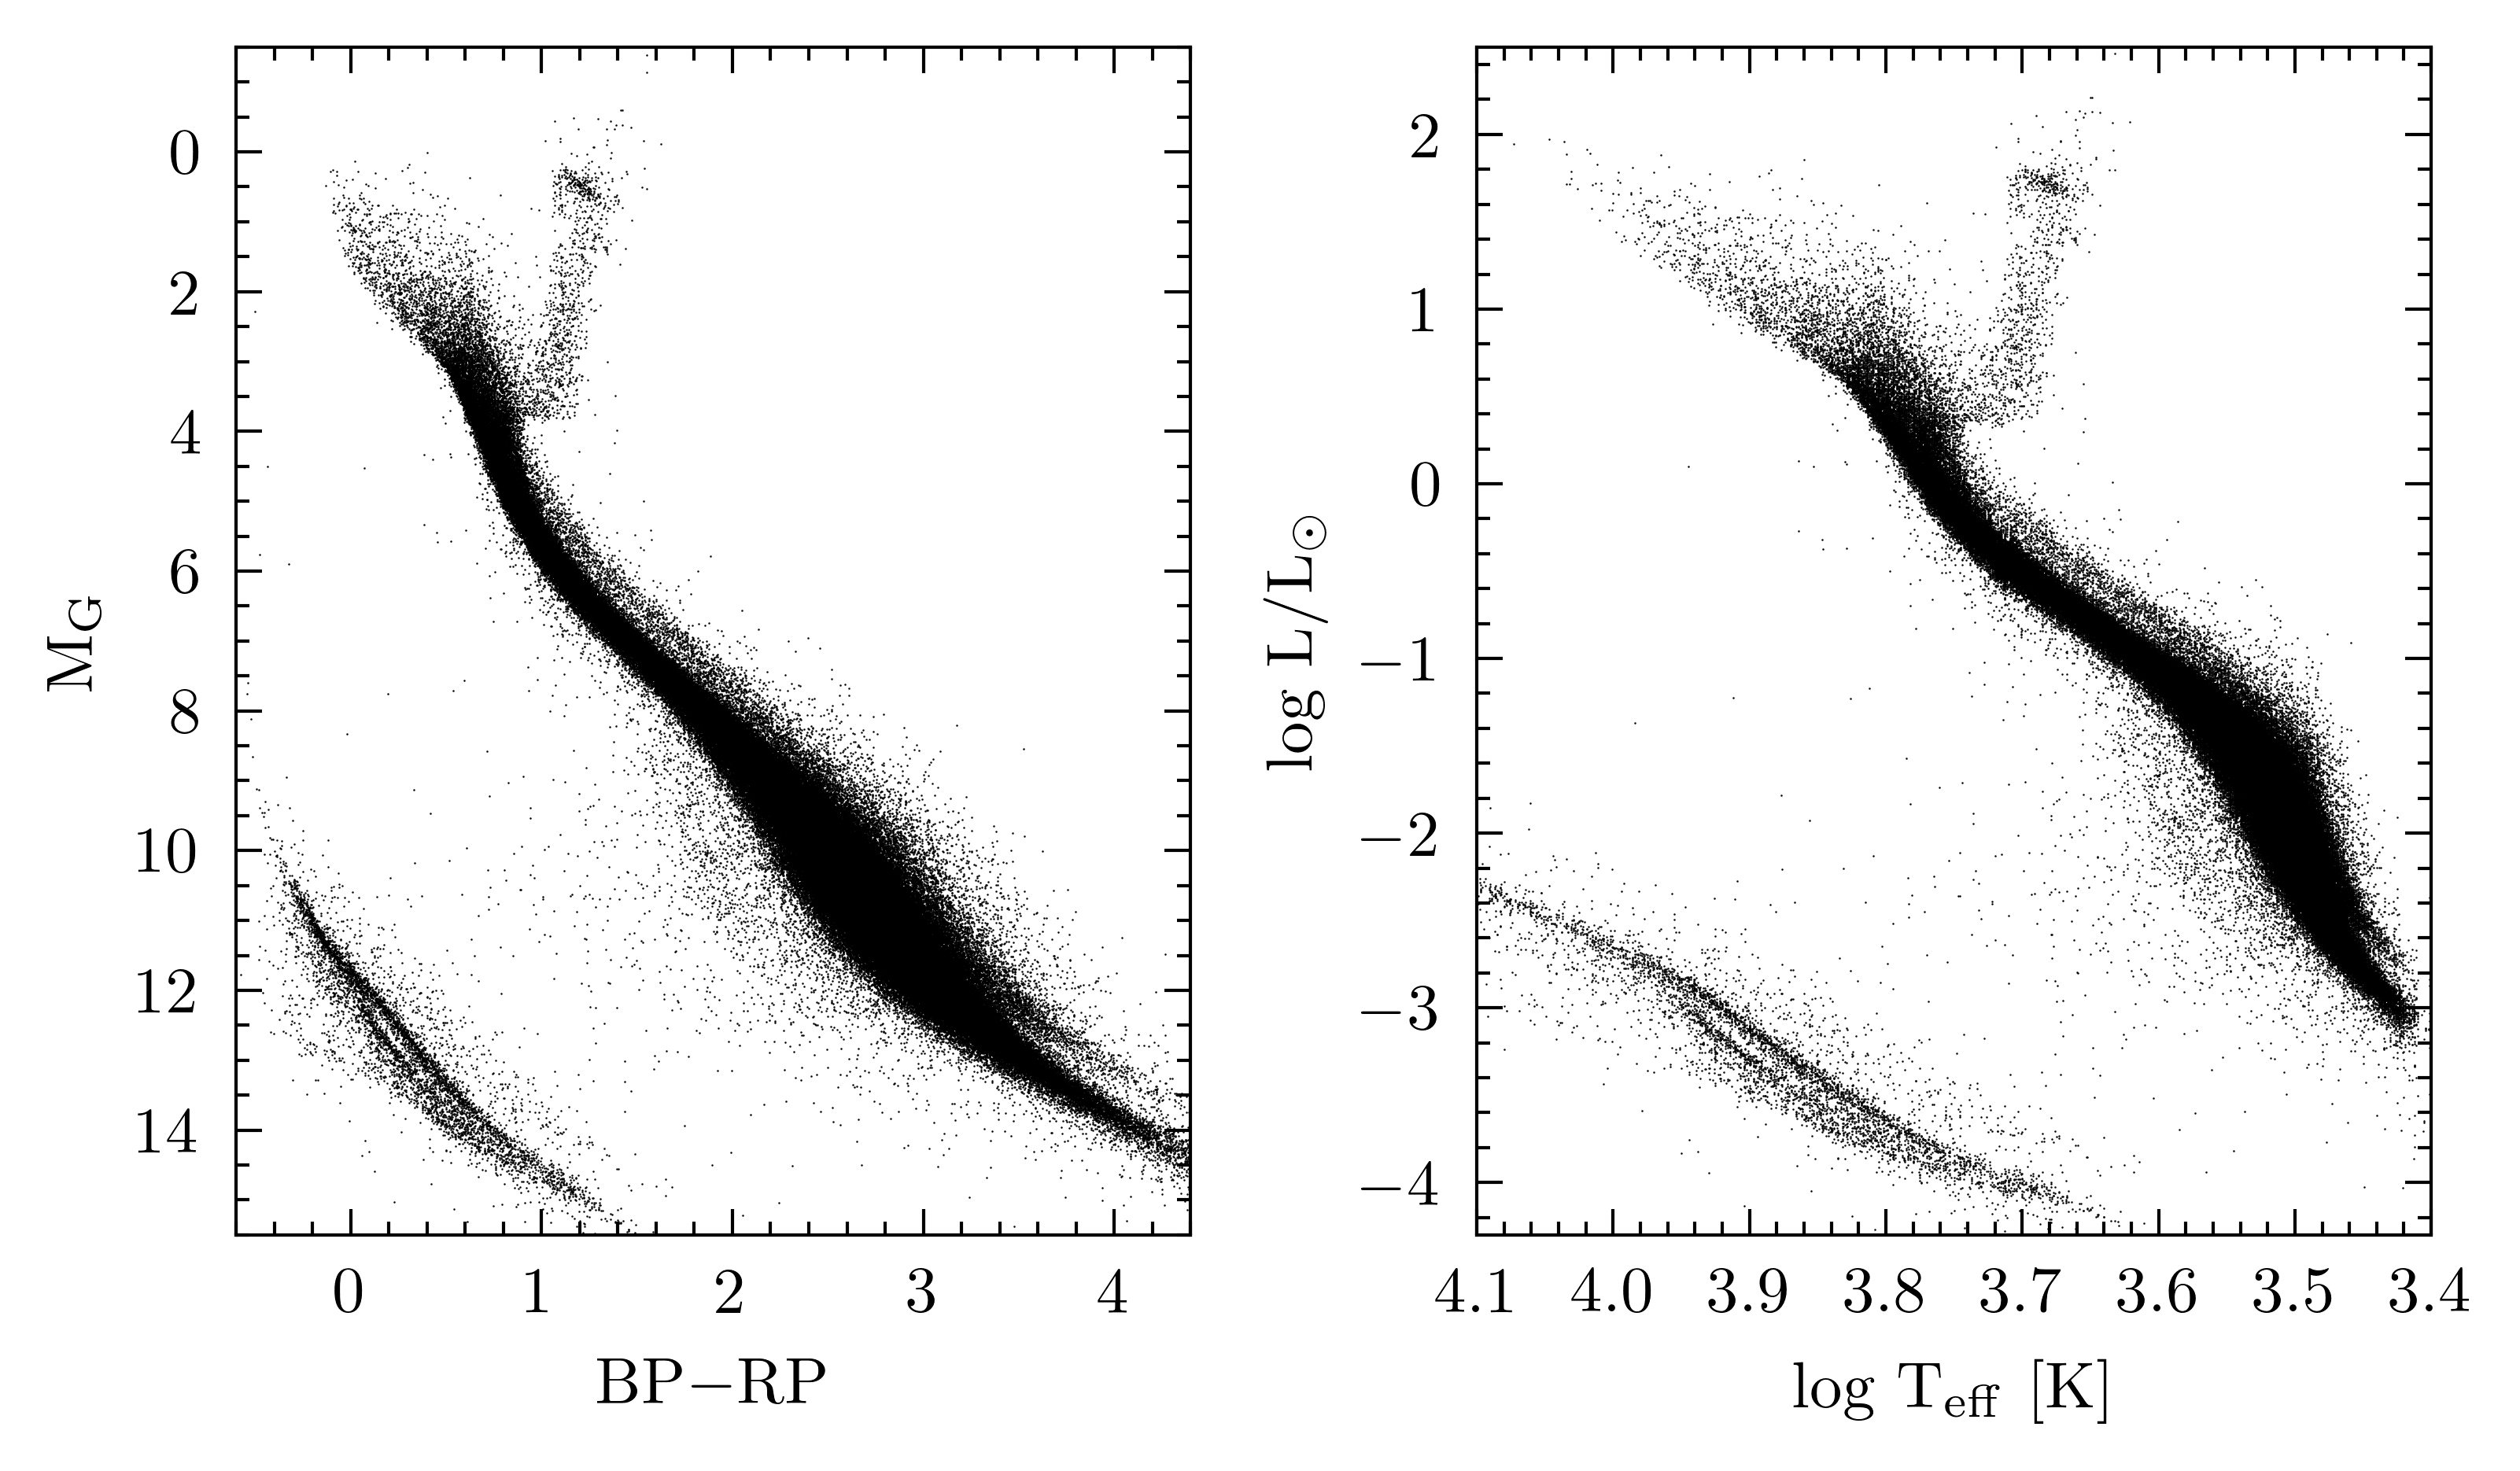

In [8]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(wInches,hInches),dpi=dpi)
    
fig.subplots_adjust(wspace=0.3, hspace=0)

# Left panel

ax1.set_xlim(-0.6,4.4)
ax1.set_ylim(15.5,-1.5)
ax1.tick_params('both',length=4,width=lwidth,which='major',direction='in',top='on',right='on')
ax1.tick_params('both',length=2,width=lwidth,which='minor',direction='in',top='on',right='on')
ax1.xaxis.set_major_locator(MultipleLocator(1.0))
ax1.xaxis.set_minor_locator(MultipleLocator(0.2))
ax1.set_xlabel(r'BP$-$RP', fontsize=axisFontSize)
ax1.yaxis.set_major_locator(MultipleLocator(2.0))
ax1.yaxis.set_minor_locator(MultipleLocator(0.5))
ax1.set_ylabel(r'M$_{\rm G}$',fontsize=axisFontSize)

ax1.plot(BP_RP,MG,'o',color='black',ms=0.3,mew=0,alpha=1,zorder=10)

# Right Panel

ax2.tick_params('both',length=4,width=lwidth,which='major',direction='in',top='on',right='on')
ax2.tick_params('both',length=2,width=lwidth,which='minor',direction='in',top='on',right='on')
ax2.set_xlim(4.1,3.4)
ax2.xaxis.set_major_locator(MultipleLocator(0.1))
ax2.xaxis.set_minor_locator(MultipleLocator(0.02))
ax2.set_xlabel(r'log T$_{\rm eff}$ [K]',fontsize=axisFontSize)
ax2.set_ylim(-4.3,2.5)
ax2.yaxis.set_major_locator(MultipleLocator(1.0))
ax2.yaxis.set_minor_locator(MultipleLocator(0.2))
ax2.set_ylabel(r'log L/L$_\odot$',fontsize=axisFontSize)

ax2.plot(logTeff,logL,'o',color='black',ms=0.3,mew=0,alpha=1,zorder=10)

plt.plot()
plt.savefig(plotFile,bbox_inches='tight',facecolor='white')